updated ozone data on 02/11/2019
TODO List
1. Multivariate analysis of O3, CO, NO2 (Both carbon monoxide and nitrogen dioxide are precursor to ozone formation)and interaction with temperature.  Higher temperature means more ozone production.
2. seasonal trend and statistical analysis of variation over time e.g. if ozone is increasing with time during summer or winter season. 
3. Check for any anomaly in ozone or PM2.5 as it may be an indicator of long range transport of pollutants.
4. Develop prediction model and predict future trends of ozone and its impact on the health.



In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

from scipy.stats import linregress, stats
from textwrap import wrap
from scipy import optimize

In [164]:
# to read excel file with multiple sheets 2010-2018
xls = pd.ExcelFile('Resource1/CA-daily-O3-ppb-2010-2018-Alexis.xlsx', )
ozone_2010 = pd.read_excel(xls, '2010', encoding='utf8')
ozone_2011 = pd.read_excel(xls, '2011', encoding='utf8')
ozone_2012 = pd.read_excel(xls, '2012', encoding='utf8')
ozone_2013 = pd.read_excel(xls, '2013', encoding='utf8')
ozone_2014 = pd.read_excel(xls, '2014', encoding='utf8')
ozone_2015 = pd.read_excel(xls, '2015', encoding='utf8')
ozone_2016 = pd.read_excel(xls, '2016', encoding='utf8')
ozone_2017 = pd.read_excel(xls, '2017', encoding='utf8')
ozone_2018 = pd.read_excel(xls, '2018', encoding='utf8')
ozone_2018.head(10)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,25,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
1,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,31,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
2,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,4,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
3,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,24,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
4,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,22,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
5,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,29,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
6,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,17,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
7,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,6,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
8,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,25,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
9,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,28,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390


In [165]:
# to view header of the columns
ozone_2018.columns
print(ozone_2018.columns)


Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'O3_ppb', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')


In [166]:
# remove extraneous columns from every df
sheets_O3 = [ozone_2010, ozone_2011, ozone_2012, ozone_2013, ozone_2014, ozone_2015, ozone_2016, ozone_2017, ozone_2018]
for df in sheets_O3:
    df.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'City Name',
       'CBSA Name', 'Date of Last Change'], axis=1, inplace=True)
ozone_2017.head()

,Date Local,O3_ppb,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,County Name,Date of Last Change.1
0,2017-01-01,33.706,0.033706,0.035,9,32,Alameda,41839
1,2017-01-02,23.412,0.023412,0.032,9,30,Alameda,41839
2,2017-01-03,29.588,0.029588,0.033,15,31,Alameda,41839
3,2017-01-04,23.059,0.023059,0.025,20,23,Alameda,41839
4,2017-01-05,17.294,0.017294,0.029,9,27,Alameda,41839


In [167]:
for df in sheets_O3:
    df['Date Local'] = pd.to_datetime(df['Date Local'], format='%Y-%m-%d')
    df['Year'] = pd.DatetimeIndex(df['Date Local']).year
    df['Month'] = pd.DatetimeIndex(df['Date Local']).month

In [168]:
all_ozone = pd.concat(sheets_O3, sort=False)
print(all_ozone.head())

  Date Local  O3_ppb  Arithmetic Mean  1st Max Value  1st Max Hour  AQI  \
0 2010-01-01   7.632         0.007632          0.018            10   15   
1 2010-01-02  11.958         0.011958          0.020            11   17   
2 2010-01-03  14.458         0.014458          0.020             9   17   
3 2010-01-04   7.958         0.007958          0.015             9   13   
4 2010-01-05   3.667         0.003667          0.010             9    8   

  County Name  Year  Month  Date of Last Change.1  
0     Alameda  2010      1                    NaN  
1     Alameda  2010      1                    NaN  
2     Alameda  2010      1                    NaN  
3     Alameda  2010      1                    NaN  
4     Alameda  2010      1                    NaN  


In [169]:
#to view NAN values or zero values
all_ozone.isnull().sum()

Date Local                    0
O3_ppb                        0
Arithmetic Mean               0
1st Max Value                 0
1st Max Hour                  0
AQI                           0
County Name                   0
Year                          0
Month                         0
Date of Last Change.1    472359
dtype: int64

In [170]:
#fille NAN with zero
# Check with Alexis----??????
#all_ozone1 =all_ozone.fillna(0)
#all_ozone1.head()

In [171]:
#use double square bracket when a subset is used from orignal data set instead of dropping columns from dataframes
#all_ozone2 = all_ozone1[['County Name', 'Arithmetic Mean', '1st Max Value', '1st Max Hour', 'Year','Date Local']]
all_ozone2 = all_ozone.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'Arithmetic_Mean_ppm', 'O3_ppb': 'Ozone_ppb', '1st Max Value': 'First_Max_Value', '1st Max Hour':'First_Max_Hour', 'Date Local': 'Date_Local'})
#all_RH2.columns=[c.replace(' ','_') for c in all_RH2.columns]
all_ozone2.head()

,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN


In [175]:
#which allows you to find out zero values. It treat both the index and columns of the frame as a column in the frame. The identifier index is used for the frame index; you can also use the name of the index to identify it in a query.
all_ozone3 =all_ozone2.query('(Arithmetic_Mean_ppm != 0) & (Ozone_ppb !=0) & (First_Max_Value != 0) & (First_Max_Hour != 0) & (AQI ! = 0)')
all_ozone3.head()

,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN


In [176]:
# create new column for month by extracting from Date_local
all_ozone3['Month'] = pd.DatetimeIndex(all_ozone3['Date_Local']).month
all_ozone3.head()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN


In [179]:
ozone_group1a= pd.DataFrame(all_ozone3.groupby(["Date_Local"]).mean()["Ozone_ppb"])

# ozone_group5 = pd.DataFrame(all_ozone_conc.groupby(["Year", "Month"]).mean()["Ozone (ppb)"])
# ozone_group5=ozone_group5.unstack(level=0)
ozone_group1a.head()

,Ozone_ppb
Date_Local,
2010-01-01,16.837653
2010-01-02,17.494717
2010-01-03,16.515261
2010-01-04,13.100993
2010-01-05,12.512835


In [180]:
ozone_group1b= pd.DataFrame(all_ozone3.groupby(["Date_Local"]).mean()["AQI"])

# ozone_group5 = pd.DataFrame(all_ozone_conc.groupby(["Year", "Month"]).mean()["Ozone (ppb)"])
# ozone_group5=ozone_group5.unstack(level=0)
ozone_group1b.head()

,AQI
Date_Local,
2010-01-01,22.598639
2010-01-02,22.924138
2010-01-03,22.035211
2010-01-04,17.856115
2010-01-05,17.625899


In [181]:
ozone_group2 = pd.DataFrame(all_ozone3.groupby(["Year", "Month"]).mean()["Ozone_ppb"])
ozone_group2= ozone_group2.unstack(level=0)
ozone_group2.head()

Ozone_ppb                                                         \
Year        2010       2011       2012       2013       2014       2015   
Month                                                                     
1      18.098439  17.231711  19.352226  20.479771  23.063186  17.740644   
2      22.427792  26.185114  26.918291  26.703509  26.836622  26.617030   
3      30.367817  29.462040  32.801113  32.439255  33.640572  34.331180   
4      34.295860  34.569461  36.597820  37.942251  39.613747  41.637056   
5      35.582212  38.861399  42.847691  40.983287  41.859341  41.628279   

                                        
Year        2016       2017       2018  
Month                                   
1      22.846971  25.733773  19.852526  
2      27.582109  28.179795  29.961704  
3      32.455284  32.861652  31.749764  
4      38.081861  39.592426  38.807708  
5      37.149632  39.404663  37.744938

In [185]:
ozone_AQI_group3 = pd.DataFrame(all_ozone3.groupby(["Year", "Month"]).mean()["AQI"])
ozone_AQI_group3= ozone_group2.unstack(level=0)
ozone_AQI_group3.tail()

           Year  Month
Ozone_ppb  2018  8        44.215029
                 9        33.774004
                 10       31.988355
                 11             NaN
                 12             NaN
dtype: float64

In [197]:
#Save file to output folder after grouping with year and month
ozone_group1a.to_csv("Output1\cumulative_ozone_series.csv" )

In [198]:
Bins=[0,20,40,60,110]
Group_name=['Low_O3', 'Moderate_O3','High_O3','Extreme_O3']

In [199]:
# #the binning is based on Ozone_ppb
all_ozone3["ozone_Levels"]=pd.cut(all_ozone3["Ozone_ppb"],Bins,labels=Group_name)
all_ozone3.head()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1,ozone_Levels
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN,Low_O3
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN,Low_O3
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN,Low_O3
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN,Low_O3
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN,Low_O3


In [200]:
# #Save file to output folder as Binned O3
all_ozone3.to_csv("Output1\Binned_ozone.csv" )

In [202]:
# create new column for month by extracting from Date_local
all_ozone3['Month'] = pd.DatetimeIndex(all_ozone3['Date_Local']).month
all_ozone3.head()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1,ozone_Levels
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN,Low_O3
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN,Low_O3
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN,Low_O3
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN,Low_O3
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN,Low_O3


In [203]:
#convert DF to array
ozone_date=pd.DatetimeIndex(all_ozone3["Date_Local"]).values
ozone_date

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ...,
       '2018-09-28T00:00:00.000000000', '2018-09-29T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [204]:
ozone_values=all_ozone3["Ozone_ppb"].values
ozone_values

array([ 7.632, 11.958, 14.458, ..., 35.765, 26.588, 34.25 ])

In [205]:
ozone_date.dtype

dtype('<M8[ns]')

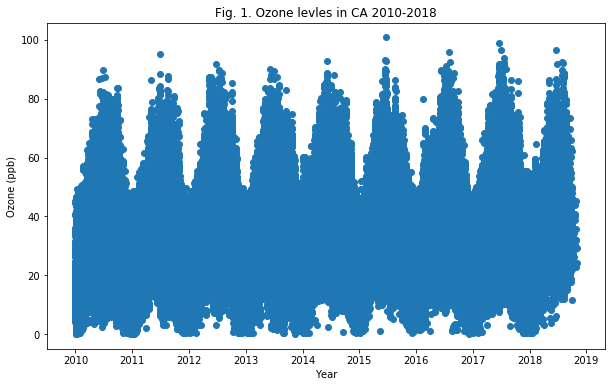

<Figure size 720x720 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [206]:
plt.scatter(ozone_date, ozone_values)
plt.title("Fig. 1. Ozone levles in CA 2010-2018")
plt.ylabel("Ozone (ppb)")
plt.xlabel("Year")
#plt.grid(linestyle="dashed")
#plt.ylim(-1,130)
#plt.xlim(-90,90)
#plt.xticks(rotation='horizontal')
#plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
# Show plot
plt.figure(figsize=(10,10))
plt.show()
plt.savefig('Output1/CA-daily-O3 levels-2010_2018.png')

In [207]:
x_axis = ozone_date
y_axis = ozone_values

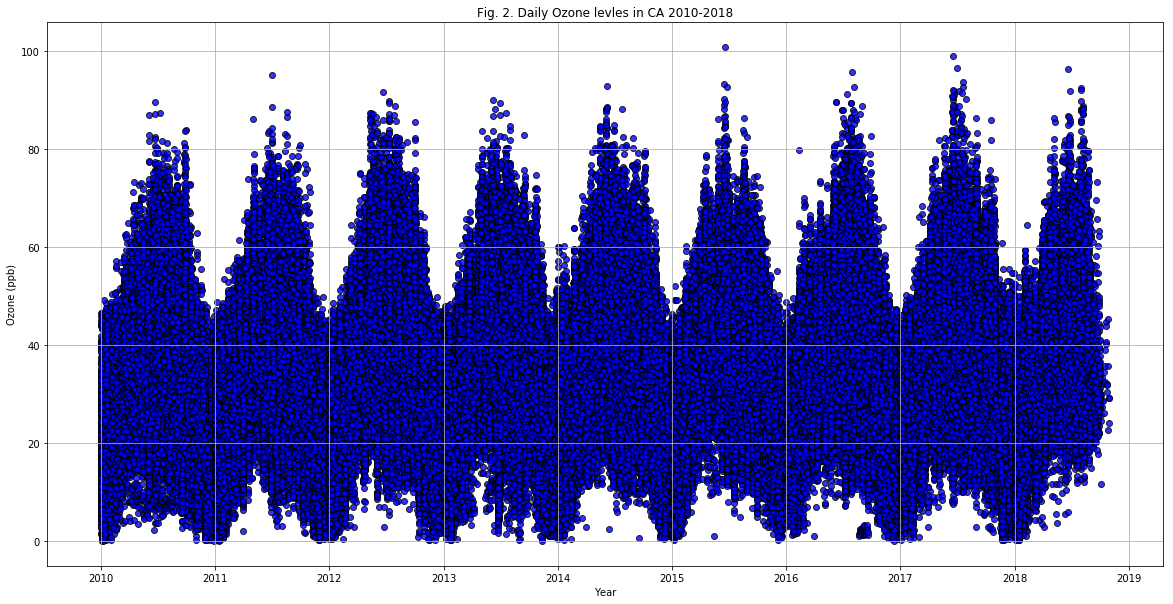

In [208]:
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha= 0.8, edgecolors="black")
plt.title("Fig. 2. Daily Ozone levles in CA 2010-2018")
plt.ylabel("Ozone (ppb)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [209]:
plt.savefig('Output1/daily_O3_CA_2010_2018.png')

<Figure size 720x432 with 0 Axes>

# ARIMA MODEL FROM HERE!! 

Time series forecasting in Python (for noobs)
Time series data is basically f(t) where t = time. Given f(t), t = 0, 1, ...n, we want to predict the future. To do forecasting, we need the time series to be stationary process.
We can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

Constant mean
Constant variance
An autocovariance that does not depend on time.

Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. 

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the Test Statistic is less than the Critical Value, we can reject the null hypothesis and say that the series is stationary.

In [3]:
dataset = pd.read_csv("./Output1/cumulative_ozone_series.csv")

# create new column for month by extracting from Date_local
# dataset['Month'] = pd.DatetimeIndex(dataset['Date_Local']).month
# dataset.tail(5)

In [4]:
from datetime import datetime
dataset['Month']= pd.to_datetime(dataset['Date_Local'], infer_datetime_format = True)
dataset=dataset.drop(['Date_Local'],axis=1)
IndexedDataset = dataset.set_index(['Month'])
IndexedDataset.tail()

,Ozone_ppb
Month,
2018-10-27,45.353
2018-10-28,22.765
2018-10-29,29.176
2018-10-30,24.059
2018-10-31,29.167


In [5]:
IndexedDataset.count()

Ozone_ppb    3226
dtype: int64

In [6]:
#convert DF to array
ozone_date=dataset["Month"].values
ozone_date

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ...,
       '2018-10-29T00:00:00.000000000', '2018-10-30T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [7]:
ozone_values=dataset["Ozone_ppb"].values
ozone_values

array([16.83765306, 17.49471724, 16.51526056, ..., 29.176     ,
       24.059     , 29.167     ])

In [8]:
ozone_date.dtype

dtype('<M8[ns]')

In [9]:
x_axis = ozone_date
y_axis = ozone_values




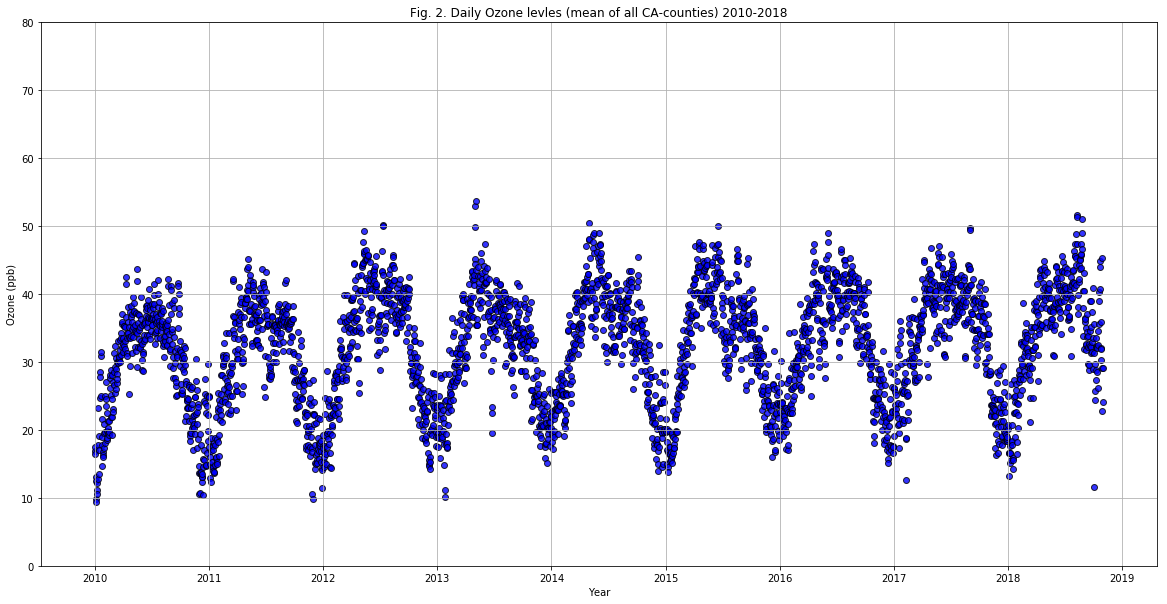

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o",  facecolors="blue", alpha= 0.8, edgecolors="black")
plt.ylim([0,80])
plt.title("Fig. 2. Daily Ozone levles (mean of all CA-counties) 2010-2018")
plt.ylabel("Ozone (ppb)")
plt.xlabel("Year")
plt.grid(True)
plt.show()
plt.savefig('Output1/Meanofallcounties_daily_O3_CA_2010_2018.png')

In [11]:
#Determine Rolling Statistics
#window 12 is used for 12 month, we can use for daily levels as window = 365
rolmean = IndexedDataset.rolling(window =12).mean()
rolstd = IndexedDataset.rolling(window = 12).std()
print(rolmean, rolstd)

            Ozone_ppb
Month                
2010-01-01        NaN
2010-01-02        NaN
2010-01-03        NaN
2010-01-04        NaN
2010-01-05        NaN
2010-01-06        NaN
2010-01-07        NaN
2010-01-08        NaN
2010-01-09        NaN
2010-01-10        NaN
2010-01-11        NaN
2010-01-12  13.351782
2010-01-13  13.882027
2010-01-14  14.010492
2010-01-15  13.757721
2010-01-16  14.088465
2010-01-17  15.101063
2010-01-18  16.654185
2010-01-19  18.190685
2010-01-20  19.840730
2010-01-21  21.574555
2010-01-22  22.650640
2010-01-23  23.383691
2010-01-24  23.470832
2010-01-25  23.024387
2010-01-26  22.666882
2010-01-27  22.941900
2010-01-28  22.883248
2010-01-29  22.168345
2010-01-30  21.531557
...               ...
2018-10-02  34.140039
2018-10-03  31.863567
2018-10-04  31.087772
2018-10-05  30.440739
2018-10-06  30.306772
2018-10-07  29.961006
2018-10-08  29.611528
2018-10-09  29.287706
2018-10-10  28.565483
2018-10-11  28.525256
2018-10-12  28.431417
2018-10-13  28.147167
2018-10-14

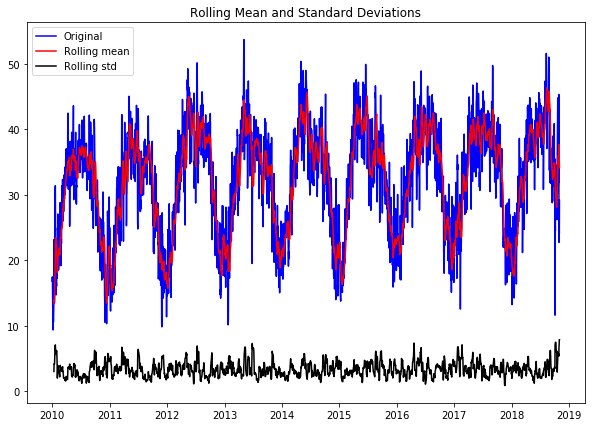

In [12]:
#plot rolling statistics:
plt.figure(figsize=(10,7))
orig = plt.plot(IndexedDataset, color = 'blue',label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Standard Deviations')
plt.show(block = False)

In [13]:
#Performing Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(IndexedDataset['Ozone_ppb'], autolag ='AIC')
dfoutput = pd.Series(dftest[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.961347
p-value                           0.001627
#Lags Used                       28.000000
Number of Observations Used    3197.000000
Critical Value (1%)              -3.432397
Critical Value (5%)              -2.862444
Critical Value (10%)             -2.567251
dtype: float64


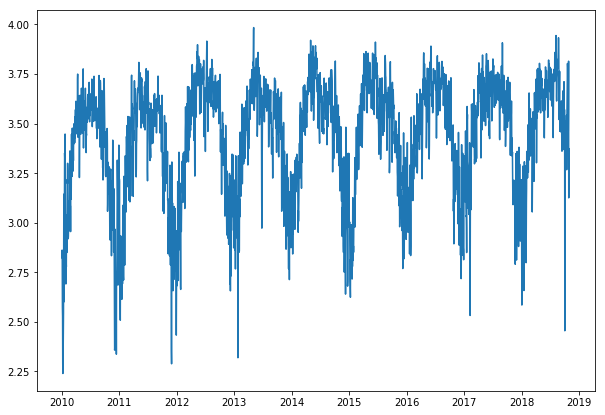

In [14]:
#Estimating Trend
plt.figure(figsize=(10,7))
IndexedDataset_logscale = np.log(IndexedDataset)
plt.plot(IndexedDataset_logscale)

No handles with labels found to put in legend.


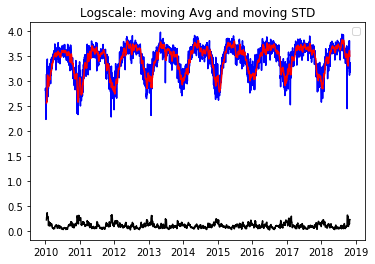

In [15]:
movingAverage = IndexedDataset_logscale.rolling(window=12).mean()
movingSTD = IndexedDataset_logscale.rolling(window =12).std()
plt.plot(IndexedDataset_logscale, color = 'blue')
plt.plot(movingAverage, color = 'red')
plt.plot(movingSTD, color = 'black')
plt.legend(loc = 'best')
plt.title('Logscale: moving Avg and moving STD')
plt.show(block = False)

In [16]:
datasetLogScaleMinusMovingAverage = IndexedDataset_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)



,Ozone_ppb
Month,
2010-01-01,NaN
2010-01-02,NaN
2010-01-03,NaN
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
2010-01-09,NaN


In [17]:
#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(10)

,Ozone_ppb
Month,
2010-01-12,0.313869
2010-01-13,0.549482
2010-01-14,0.344615
2010-01-15,0.016534
2010-01-16,0.230444
2010-01-17,0.541922
2010-01-18,0.599424
2010-01-19,0.483811
2010-01-20,0.503643


In [18]:
#It is not needed in this case???
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD= timeseries.rolling(window = 12).std()
    #Plot Rolling statistics:
    plt.figure(figsize=(10,7))
    orig = plt.plot(timeseries, color = 'blue',  label = 'Original')
    mean = plt.plot(timeseries, color = 'red', alpha = 0.6, label = 'Rolling Mean')
    std  = plt.plot(timeseries, color = 'black', alpha = 0.6, label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Ozone_ppb'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   -3.961347
p-value                           0.001627
#Lags Used                       28.000000
Number of Observations Used    3197.000000
Critical Value (1%)              -3.432397
Critical Value (5%)              -2.862444
Critical Value (10%)             -2.567251
dtype: float64


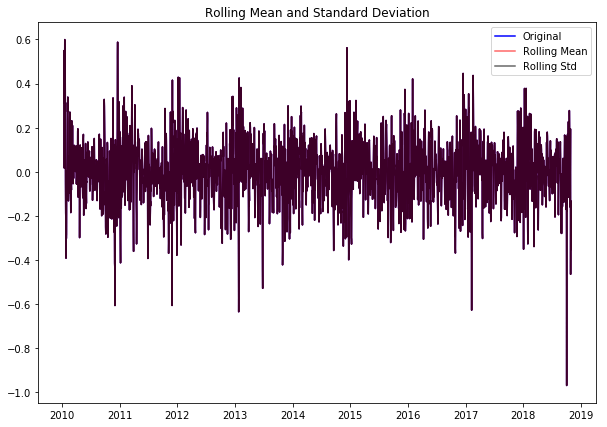

Results of Dickey-Fuller Test:


In [19]:
test_stationarity(datasetLogScaleMinusMovingAverage)

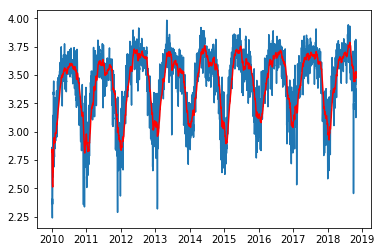

In [20]:
exponentialDecayWeightedAverage = IndexedDataset_logscale.ewm(halflife = 12, min_periods= 0, adjust = True).mean()
plt.plot(IndexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

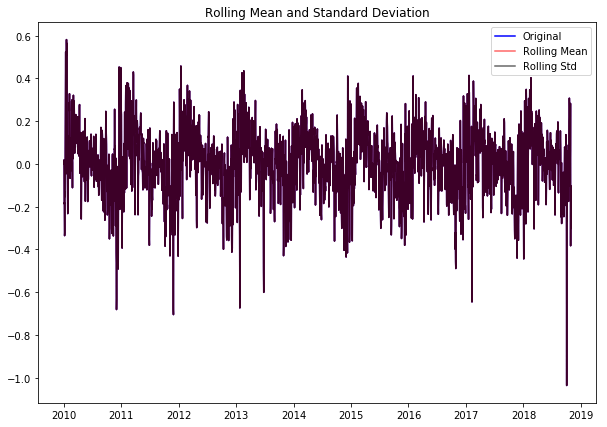

Results of Dickey-Fuller Test:


In [21]:
datasetLogScaleMinusMovingExponentialDecayAverage = IndexedDataset_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

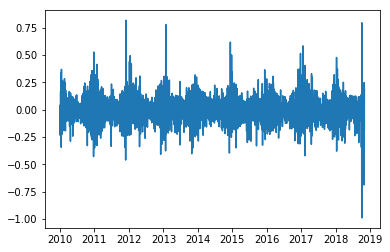

In [22]:
datasetLogDiffShifting = IndexedDataset_logscale - IndexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

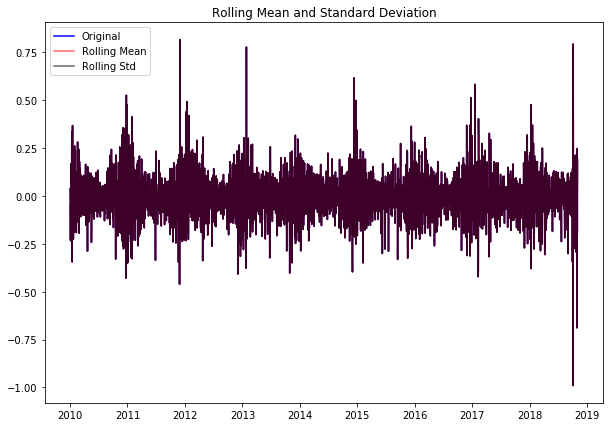

Results of Dickey-Fuller Test:


In [23]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

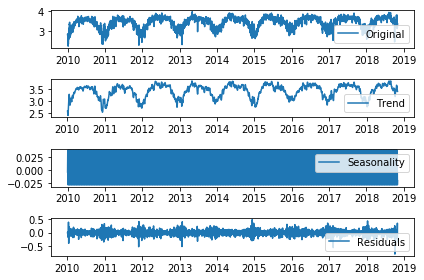

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompositon = seasonal_decompose(IndexedDataset_logscale)

trend = decompositon.trend
seasonal = decompositon.seasonal
residual = decompositon.resid

plt.subplot(411)
plt.plot(IndexedDataset_logscale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

# decomposedLogData = residual
# decomposedLogData.dropna(inplace = True)
# test_stationarity(decomposedLogData)

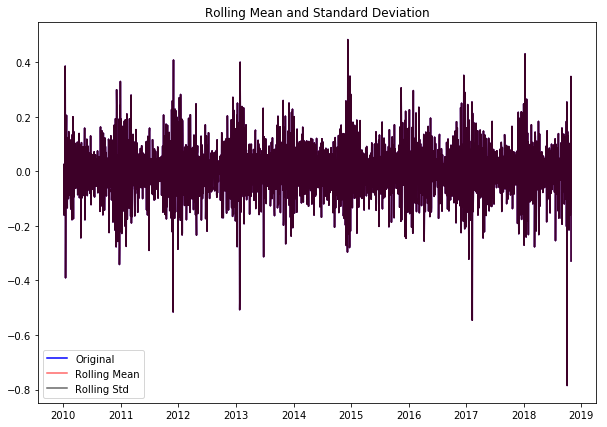

Results of Dickey-Fuller Test:


In [25]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

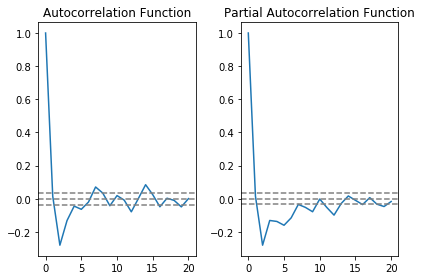

In [26]:
#ACF and PACF plots:
#ols = ordinary least square method

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

# #Plot ACF:
# plt.subplot(121)
# plt.plot(lag_acf)
# plt.axhline(y = 0, linestyle = '--', color = 'gray')
# plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linesytle = '-', color = 'gray')
# plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linesytle = '-', color = 'gray')
# plt.title('Autocorrelation Function')

# #plot PACF
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y = 0, linestyle = '--', color = 'gray')
# plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linesytle = '--', color = 'gray')
# plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linesytle = '--', color = 'gray')
# plt.title('Partial Autocorrelation Function')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


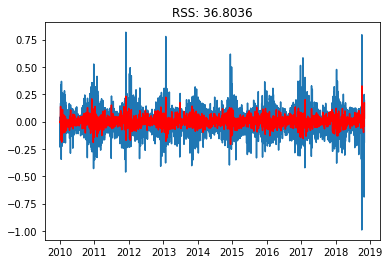

In [32]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
#Residual sum square vlaues

model = ARIMA(IndexedDataset_logscale, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Ozone_ppb'])**2))
print('Plotting AR model')

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


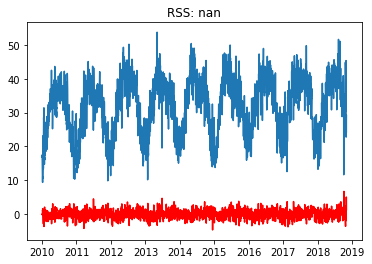

In [37]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(IndexedDataset, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(IndexedDataset)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-IndexedDataset['Ozone_ppb'])**2))
print('Plotting AR model')

In [52]:
# MA model

model = ARIMA(IndexedDataset_logscale, order=(0, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(IndexedDataset_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-IndexedDataset_diff)**2))

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


NameError: name 'IndexedDataset_diff' is not defined

In [44]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Month
2010-01-02    0.005196
2010-01-03    0.024541
2010-01-04   -0.205505
2010-01-05    0.172422
2010-01-06    1.091070
dtype: float64


In [45]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2010-01-02    0.005196
2010-01-03    0.029737
2010-01-04   -0.175768
2010-01-05   -0.003346
2010-01-06    1.087724
dtype: float64


In [49]:
predictions_ARIMA_log = pd.Series(IndexedDataset_logscale['Ozone_ppb'].iloc[0], index = IndexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Month
2010-01-01    2.823618
2010-01-02    2.828814
2010-01-03    2.853354
2010-01-04    2.647850
2010-01-05    2.820272
dtype: float64

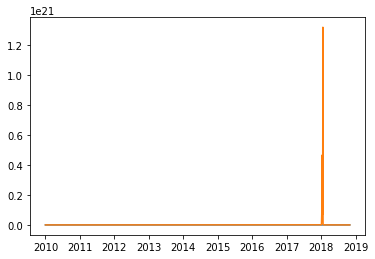

In [50]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(IndexedDataset)
plt.plot(predictions_ARIMA)